In [1]:
from functools import reduce
import numpy as np
from constants import *
from green_function import *
#import holoviews
from scipy import linalg as sla
import matplotlib as mp
plt.style.use('seaborn')		# Setting the plotting style
mp.rcParams['figure.figsize'] = (15, 10)  # Setting the size of the plots
import numpy.linalg as la 

'''
delta = 0
a = 0
B = 0
mu = 0
'''

def evolution_operator(hamiltonians, T):
    n = len(hamiltonians)
    exps = [sla.expm(-1j * h * T / n) for h in hamiltonians]
    return reduce(np.matmul, exps)


def calculate_finite_spectrum(periods, hamiltonians):
    energies = []
    for T in periods:
        U = evolution_operator(hamiltonians, T)
        phases = np.angle(la.eigvals(U))
        phases = np.sort(np.abs(phases))
        ev = np.sort([(-1) ** n * val for n, val in enumerate(phases)])
        energies.append(ev)
    return np.array(energies).real


def calculate_bands(momenta, hamiltonians_k, T):
    energies = []
    for k in momenta:
        hamiltonians = [h_k(k) for h_k in hamiltonians_k]
        U = evolution_operator(hamiltonians, T)
        phases = np.angle(la.eigvals(U))
        phases = np.sort(np.abs(phases))
        ev = np.sort([(-1) ** n * val for n, val in enumerate(phases)])
        energies.append(ev)
    return np.array(energies).real


def onsite(mu=mu):
    return -mu * s_z


def hopping(t=t, delta=delta):
    return -t * s_z +  1j * delta * s_y


#var_time = dict()
#periods = np.linspace(0.2 / t, 1.6 / t, 100)
periods = np.linspace(0.2 / t, 5 / t, 100)
momenta = np.linspace(-2*np.pi, 2*np.pi,1000)
#omegas = 2 * np.pi / periods
#var_time = [np.linspace(0,T,11) for T in periods]

h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping())
h_2 = Hamiltonian(d,N,onsite(mu=1*t),hopping())


#energies = calculate_finite_spectrum(periods, [h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()])
#spectrum = np.array([calculate_bands(momenta, [h_1.k_space_hamiltonian, h_2.k_space_hamiltonian], T) for T in periods])



In [2]:
print(h_1.k_space_hamiltonian(5))

[[-1.78230208+0.j          0.        -3.01254946j]
 [ 0.        +3.01254946j  1.78230208+0.j        ]]


C:\Users\Eslam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


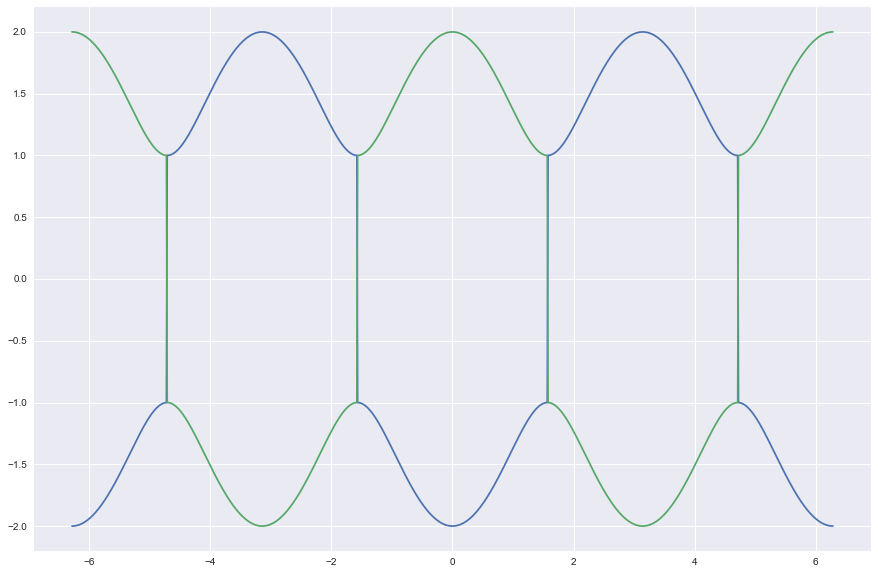

In [3]:
t = 1
h_1 = Hamiltonian(d,N,onsite(mu=0*t),hopping(t=t,delta=0.5*t))

spec = []
for k in momenta:
    #spec.append(la.eigvals(h_1.k_space_hamiltonian(k)))
    spec.append(np.linalg.eig(h_1.k_space_hamiltonian(k))[0])
    #spec.append(np.linalg.eig(h_2.k_space_hamiltonian(k))[0])
plt.plot(momenta,spec)

C:\Users\Eslam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


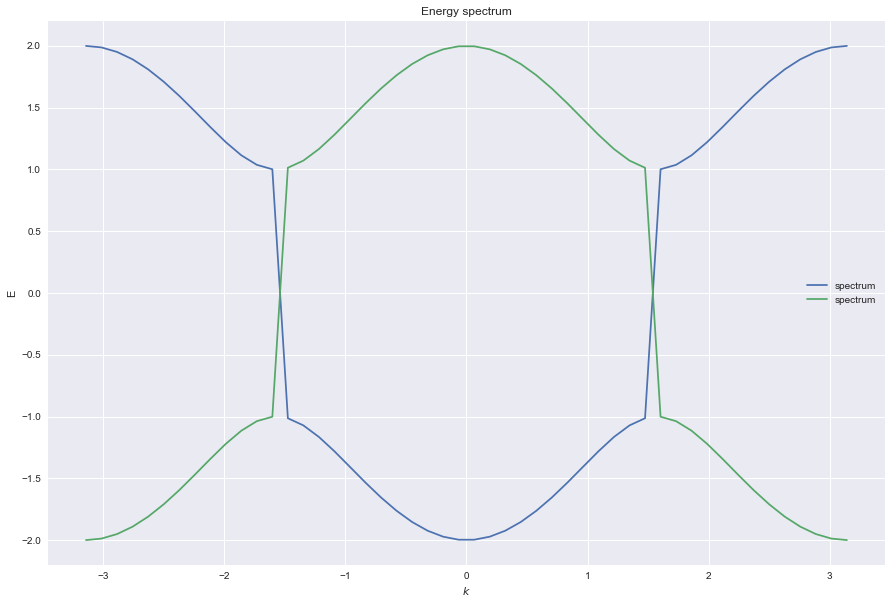

In [4]:
h_1.plot_spectrum()

NameError: name 'spectrum' is not defined

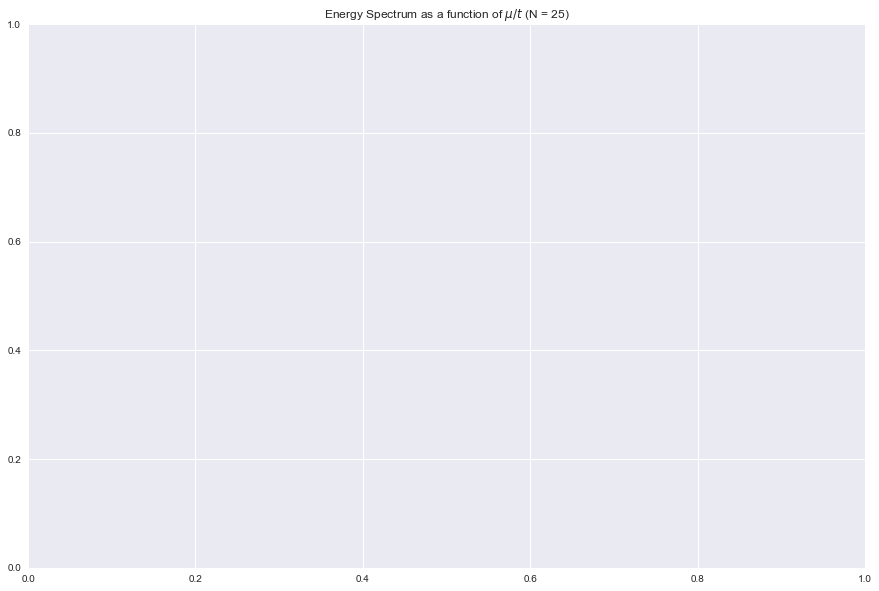

In [5]:
plt.title("Energy Spectrum as a function of $\mu/t$ (N = 25)")
for i in range(d*N):
    plt.plot(periods,spectrum[:,i])
plt.ylabel('Energy')
plt.xlabel('$\mu/t$')
#plt.show()
plt.savefig('interesting bulk spectrum.png')

In [ ]:
def onsite(t=t, mu=mu, B=B, delta=delta):
    return (2 * t - mu) * np.kron(s_z,s_0) + B * np.kron(s_0,s_z) + delta * np.kron(s_x,s_0)


def hopping(t=t, alpha=a):
    return -t * np.kron(s_z,s_0) + 0.5 * 1j * alpha * np.kron(s_z,s_x)

J = 2.0
p1 = {'t':J / 2, 'mu':-1 * J, 'B':J, 'delta':2 * J, 'alpha':J}
p2 = {'t':J / 2, 'mu':-3 * J, 'B':J, 'delta':2 * J, 'alpha':J}



periods = np.linspace(0.2 / J, 1.6 / J, 100)
momenta = np.linspace(-np.pi, np.pi)

h_1 = Hamiltonian(4,N,onsite(t = p1['t'],mu=p1['mu'],B=p1['B'],delta=p1['delta']),hopping(t=p1['t'],alpha=p1['alpha']))
h_2 = Hamiltonian(4,N,onsite(t = p2['t'],mu=p2['mu'],B=p2['B'],delta=p2['delta']),hopping(t=p2['t'],alpha=p2['alpha']))


energies = calculate_finite_spectrum(periods, [h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()])
spectrum = np.array([calculate_bands(momenta, [h_1.k_space_hamiltonian, h_2.k_space_hamiltonian], T) for T in periods])


In [ ]:
plt.title("Energy Spectrum as a function of $T$ (N = 25)")
for i in range(4*N):
    plt.plot(periods,energies[:,i])
plt.ylabel('Energy')
plt.xlabel('$\mu/t$')
plt.show()


In [ ]:
print(spectrum.shape)

In [ ]:
def onsite(t=t, mu=mu, B=B, delta=delta):
    return ( - mu) * s_z  


def hopping(t=t, alpha=a):
    return -t * s_z  + 1j * delta * s_y

'''
J =  np.pi
p1 = {'t':J , 'mu':1 * J, 'B':0, 'delta':0.5 * J, 'alpha':0}
p2 = {'t':J , 'mu':3 * J, 'B':0, 'delta':0.5 * J, 'alpha':0}
'''


periods = np.linspace(0.2 / J, 3 / J, 200)
momenta = np.linspace(-np.pi, np.pi)
N = 50
h_1 = Hamiltonian(2,N,onsite(mu=1*t),hopping())
h_2 = Hamiltonian(2,N,onsite(mu=3*t),hopping())


energies = calculate_finite_spectrum(periods, [h_1.lattice_hamiltonian(), h_2.lattice_hamiltonian()])
spectrum = np.array([calculate_bands(momenta, [h_1.k_space_hamiltonian, h_2.k_space_hamiltonian], T) for T in periods])


In [ ]:
plt.title("Energy Spectrum as a function of $T$ (N = 25)")
for i in range(2*N):
    plt.plot(periods,energies[:,i]/np.pi)
plt.ylabel('Energy')
plt.xlabel('$\mu/t$')
plt.show()
